In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import time

/Users/sonianindra/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the digits dataset
digits = load_digits()

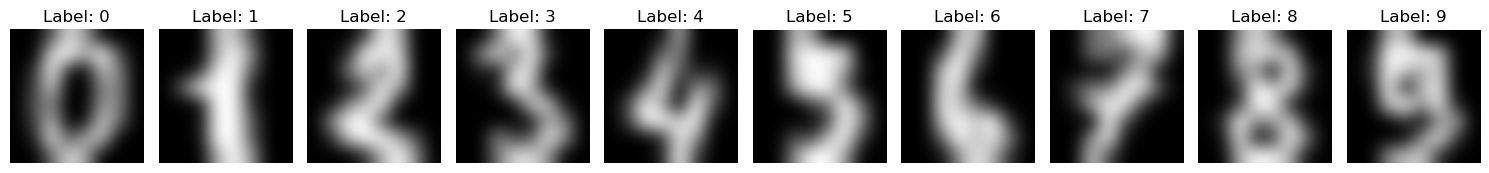

In [3]:
# Show some sample images along with their labels
num_images_to_show = 10

fig, axes = plt.subplots(nrows=1, ncols=num_images_to_show, figsize=(15, 4), dpi=100)

for i in range(num_images_to_show):
    axes[i].imshow(digits.images[i], cmap='gray',interpolation='bicubic')  
    axes[i].set_title(f"Label: {digits.target[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Split the dataset into features and labels
X,y = digits.data, digits.target

In [5]:
# Binarize the labels for binary classification (0-4: 0, 5-9: 1)
y_binary = np.where(y < 5, 0, 1)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [7]:
# Get the unique labels of train and test
unique_labels_train = np.unique(y_train)
unique_labels_test = np.unique(y_test)

print("Unique labels in training set:", unique_labels_train)
print("Unique labels in testing set:", unique_labels_test)

Unique labels in training set: [0 1]
Unique labels in testing set: [0 1]


In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Define the sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

In [10]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) 
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [11]:
def softmax_derivative(softmax_output):
    s = softmax_output.reshape(-1, 1)  
    return np.diagflat(s) - np.dot(s, s.T)

In [12]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_hidden_output = np.zeros((1, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def compute_loss(self, y_pred, y_true):
        m = y_true.shape[0]
        epsilon = 1e-8  # prevent log(0) error
        log_likelihood = -np.log(y_pred[range(m), y_true] + epsilon)
        loss = np.sum(log_likelihood) / m
        return loss

    def forward_propagation(self, X):
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_layer_output = self.relu(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_hidden_output
        self.output = self.softmax(self.output_layer_input)
        return self.output

    def train(self, X, y, epochs=1000, learning_rate=0.01):
        y_true = np.eye(self.weights_hidden_output.shape[1])[y]  

        loss_history = []
        fig, ax = plt.subplots()
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.set_title('Training Loss')

        pbar = tqdm(total=epochs, desc='Training')

        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X)

            loss = self.compute_loss(output, y)
            loss_history.append(loss)

            # Backprop
            error_output_layer = output - y_true
            delta_hidden_output = np.dot(self.hidden_layer_output.T, error_output_layer)
            delta_bias_output = np.sum(error_output_layer, axis=0, keepdims=True)

            error_hidden_layer = np.dot(error_output_layer, self.weights_hidden_output.T) * self.relu_derivative(self.hidden_layer_output)
            delta_input_hidden = np.dot(X.T, error_hidden_layer)
            delta_bias_hidden = np.sum(error_hidden_layer, axis=0, keepdims=True)

            # Updating bias/weights
            self.weights_hidden_output -= learning_rate * delta_hidden_output
            self.bias_hidden_output -= learning_rate * delta_bias_output
            self.weights_input_hidden -= learning_rate * delta_input_hidden
            self.bias_input_hidden -= learning_rate * delta_bias_hidden

            # prog bar
            pbar.set_description('Training (loss: {:.4f})'.format(loss))
            pbar.update(1)

        pbar.close()
        ax.plot(loss_history, color='blue')
        plt.show()

In [13]:
def accuracy(y_pred, y_true):
    predictions = np.argmax(y_pred, axis=1)
    return np.mean(predictions == y_true)

Training (loss: 0.0161): 100%|███████████████| 100/100 [00:00<00:00, 122.73it/s]


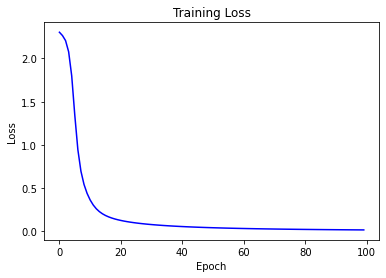

Accuracy of the network on the test set: 97.22%


In [14]:
#neural network
input_size = 64  
hidden_size = 256  
output_size = 10  
nn = NeuralNetwork(input_size, hidden_size, output_size)

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X = digits.data
y = digits.target
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test
nn.train(X_train, y_train, epochs=100, learning_rate=0.001)

y_pred_test = nn.forward_propagation(X_test)
test_accuracy = accuracy(y_pred_test, y_test)
print(f'Accuracy of the network on the test set: {test_accuracy * 100:.2f}%')

In [15]:
y_pred_train = nn.forward_propagation(X_train)
y_pred_test = nn.forward_propagation(X_test)

#  accuracy for both sets
train_accuracy = accuracy(y_pred_train, y_train)
test_accuracy = accuracy(y_pred_test, y_test)
print(f'Accuracy of the network on the training set: {train_accuracy * 100:.2f}%')
print(f'Accuracy of the network on the test set: {test_accuracy * 100:.2f}%')

Accuracy of the network on the training set: 100.00%
Accuracy of the network on the test set: 97.22%


Training (loss: 2.6538): 100%|██████████████| 900/900 [1:41:13<00:00,  6.75s/it]


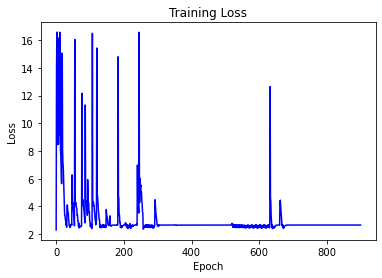

Accuracy of the network on the CIFAR-10 test set: 9.99%


In [16]:
import pickle
import numpy as np
import os

def load_cifar10_batch(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
        X = dict[b'data']
        Y = dict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_cifar10_data(data_dir):
    train_data = []
    train_labels = []

    for i in range(1, 6):
        data_path = os.path.join(data_dir, f'data_batch_{i}')
        X_batch, Y_batch = load_cifar10_batch(data_path)
        train_data.append(X_batch)
        train_labels.append(Y_batch)

    # Load the test batch and get the training data and labels
    test_data_path = os.path.join(data_dir, 'test_batch')
    test_data, test_labels = load_cifar10_batch(test_data_path)
    train_data = np.concatenate(train_data)
    train_labels = np.concatenate(train_labels)

    return (train_data, train_labels), (test_data, test_labels)


data_dir = '/Users/sonianindra/Downloads/cifar-10-batches-py'  
(train_images, train_labels), (test_images, test_labels) = load_cifar10_data(data_dir)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))
input_size = 32 * 32 * 3  
hidden_size = 800
output_size = 10   

nn = NeuralNetwork(input_size, hidden_size, output_size)

# Training 
nn.train(train_images.reshape(train_images.shape[0], -1), train_labels, epochs=900, learning_rate=0.0005)

# Testing 
# flatten the test images 
test_predictions = nn.forward_propagation(test_images.reshape(test_images.shape[0], -1))
test_accuracy = accuracy(test_predictions, test_labels)
print(f'Accuracy of the network on the CIFAR-10 test set: {test_accuracy * 100:.2f}%')

In [24]:
class NeuralNetworkBinary:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden_output = np.zeros((1, output_size))

    def forward_propagation(self, X):
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_layer_output = np.maximum(0, self.hidden_layer_input)  # ReLU activation in hidden layer
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_hidden_output
        self.output = sigmoid(self.output_layer_input)
        return self.output
    
    def compute_loss(self, X, y):
        # Forward propagation to get predicted probabilities
        output = self.forward_propagation(X)

        # Compute binary cross-entropy loss
        m = y.shape[0]  # Number of samples
        loss = -1 / m * np.sum(y * np.log(output + 1e-8) + (1 - y) * np.log(1 - output + 1e-8))

        return loss

    def train(self, X, y, learning_rate=0.01, epochs=1000):
        loss_history = []  # Initialize list to store loss values
        fig, ax = plt.subplots()  # Create figure and axis objects for the plot
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.set_title('Training Loss')
        pbar = tqdm(total=epochs, desc='Training')  # Initialize tqdm progress bar

        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X)
            
            # Backpropagation
            error = y - output
            d_output = error * sigmoid_derivative(output)  # Sigmoid derivative

            # Update weights and biases
            self.weights_hidden_output += np.dot(self.hidden_layer_output.T, d_output) * learning_rate
            self.bias_hidden_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
            d_hidden = np.dot(d_output, self.weights_hidden_output.T) * (self.hidden_layer_output > 0)  # ReLU derivative
            self.weights_input_hidden += np.dot(X.T, d_hidden) * learning_rate
            self.bias_input_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate
            
            
            # Record loss for the plot and show progress on progress bar
            
            # Compute loss and append to loss history
            loss = self.compute_loss(X, y)
            loss_history.append(loss)

            # Update progress bar description with current loss
            pbar.set_description('Training (loss: {:.4f})'.format(loss))
            pbar.update(1)  # Update progress bar

        # Plot loss function
        ax.plot(loss_history, color='blue')
        plt.show()  # Show the final plot
        
        pbar.close()  # Close tqdm progress bar after training completes

In [25]:
# Initialize the neural network
input_size = X_train.shape[1]
hidden_size = 128
output_size = 1  # Binary classification
nn_binary = NeuralNetworkBinary(input_size, hidden_size, output_size)

Training (loss: -63.7097): 100%|███████████▉| 999/1000 [00:05<00:00, 170.19it/s]

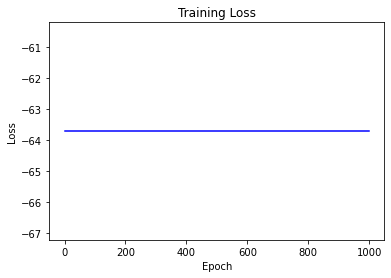

Training (loss: -63.7097): 100%|███████████| 1000/1000 [00:05<00:00, 175.34it/s]


In [26]:
# Train the neural network
nn_binary.train(X_train, y_train.reshape(-1, 1))

In [27]:
# Test the neural network
def predict(X):
    return np.where(nn_binary.forward_propagation(X) >= 0.5, 1, 0)

In [28]:
predictions = predict(X_test)

In [29]:
accuracy = np.mean(predictions == y_test.reshape(-1, 1))

In [30]:
print('Accuracy of the network on the test set: %.2f%%' % (accuracy * 100))

Accuracy of the network on the test set: 7.78%
